<a href="https://colab.research.google.com/github/yassermohamed81/support-demo-astradb-glean/blob/master/AstraDB_Glean_Integration_Support_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integrate GLEAN with AstraDB Serverless

> For more information, see the DataStax [Astra DB docs page.](#)

This notebook is a walkthrough explaining how to use a AstraDB vector database collection as a source for Glean. Using the python `astrapy` client, we read from a collection and use the glean `indexingAPI` through a `Datasource`.

## 1. Prerequisities

### 1.1 Setup AstraDB

ℹ️ [Astra Reference documentation](https://docs.datastax.com/en/astra-db-serverless/databases/create-database.html)

`✅ 1.1.a`: Create an Astra ACCOUNT

Access [https://astra.datastax.com](https://astra.datastax.com) and register with `Google` or `Github` account.

![](https://github.com/yassermohamed81/support-demo-astradb-glean/blob/master/images/01-login.png?raw=true)


`✅ 1.1.b`: Create an Astra Database

Get to the database dashboard (by clicking on Databases in the left-hand navigation bar, expanding it if necessary), and click the `[Create Database]` button on the right.

![](https://github.com/yassermohamed81/support-demo-astradb-glean/blob/master/images/02-create-db.png?raw=true)


- **ℹ️ Fields Description**

| Field                                      | Description                                                                                                                                                                                                                                    |
|--------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Vector Database vs Serverless Database** | Choose `Vector Database` In june 2023, Cassandra introduced the support of vector search to enable Generative AI use cases.                                                                                                                    |
| **Database name**                          | It does not need to be unique, is not used to initialize a connection, and is only a label (keep it between 2 and 50 characters). It is recommended to have a database for each of your applications. The free tier is limited to 5 databases. |
| **Cloud Provider**                         | Choose whatever you like. Click a cloud provider logo, pick an Area in the list and finally pick a region. We recommend choosing a region that is closest to you to reduce latency. In free tier, there is very little difference.             |
| **Cloud Region**                           | Pick region close to you available for selected cloud provider and your plan.                                                                                                                                                                  |

If all fields are filled properly, clicking the "Create Database" button will start the process.

![](https://github.com/yassermohamed81/support-demo-astradb-glean/blob/master/images/03-pending-db.png?raw=true)

It should take a couple of minutes for your database to become `Active`.

![](https://github.com/yassermohamed81/support-demo-astradb-glean/blob/master/images/04-active-db.png?raw=true)

`✅ 1.1.c`: Create an Astra TOKEN

To connect to your database, you need the API Endpoint and a token. The api endpoint is available on the database screen, there is a little icon to copy the URL in your clipboard. (it should look like `https://<db-id>-<db-region>.apps.astra.datastax.com`).

![](https://github.com/yassermohamed81/support-demo-astradb-glean/blob/master/images/05-create-token-db.png?raw=true)

To get a token click the `[Generate Token]` button on the right. It will generate a token that you can copy to your clipboard.







### 1.2 Create a Token as Glean Admin

> [Glean Documentation](https://developers.glean.com/docs/indexing_api/indexing_api_tokens/)

Admins can manage these API tokens via the API tokens page within Workspace Settings

```
Workspace > Setup > API tokens > Indexing tokens tab
```

As a glean admin create a token and assign permissions.

### 1.3 Installation of dependencies

This command will install `astrapy` (astra python client) and all associated dependencies.

In [1]:
! pip install --quiet "astrapy==1.4.1" "datasets" "python-dotenv" "pandas==2.2.2"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.6/156.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58

### 1.4 Setup Variables


In [3]:
import os
from getpass import getpass
os.environ["ASTRA_DB_APPLICATION_TOKEN"] = getpass("ASTRA_DB_APPLICATION_TOKEN = ")
os.environ["ASTRA_DB_API_ENDPOINT"] = input("ASTRA_DB_API_ENDPOINT = ")

ASTRA_DB_APPLICATION_TOKEN = ··········
ASTRA_DB_API_ENDPOINT = https://68220f7b-72c2-4a99-a245-514cc67b9360-us-east-2.apps.astra.datastax.com


## 2. Populate Data

### 2.1 Populate AstraDB collection



`✅ 2.1.a`: Connect to your Database (validating Credential)

In [5]:
import os
from astrapy import DataAPIClient
from astrapy.constants import VectorMetric
from astrapy.ids import UUID
from astrapy.exceptions import InsertManyException

# Initialize the client and get a "Database" object
client = DataAPIClient(os.environ["ASTRA_DB_APPLICATION_TOKEN"])
database = client.get_database(os.environ["ASTRA_DB_API_ENDPOINT"])
print(f"* Credential are OK you database name is {database.info().name}\n")

* Credential are OK you database name is glean_datasource_support



`✅ 2.1.b`: Create a collection with Data to index (no vector needed)

In [6]:
plain_collection = database.create_collection("plain_collection", check_exists=False)
print(f"* Collection 'plain_collection' is ready")

* Collection 'plain_collection' is ready


`✅ 2.1.c`: List and display collections of the Database

In [8]:
for coll_desc in database.list_collection_names(): print(coll_desc)

plain_collection


`✅ 2.1.d`: Load a DataSet and show an entry

In [12]:
import pandas as pd
from datasets import load_dataset

philo_dataset = load_dataset("datastax/philosopher-quotes")["train"]
print("An example entry:")
print(philo_dataset[16])

print("\nDataset Info:")
print(philo_dataset.info)

print("\nDataset Features:")
print(philo_dataset.features)

print("\nDataset Size:")
print(philo_dataset.info.dataset_size)

philo_dataframe = pd.DataFrame.from_dict(philo_dataset)

An example entry:
{'author': 'aristotle', 'quote': 'Love well, be loved and do something of value.', 'tags': 'love;ethics'}

Dataset Info:
DatasetInfo(description='', citation='', homepage='', license='', features={'author': Value(dtype='string', id=None), 'quote': Value(dtype='string', id=None), 'tags': Value(dtype='string', id=None)}, post_processed=None, supervised_keys=None, builder_name='csv', dataset_name='philosopher-quotes', config_name='default', version=0.0.0, splits={'train': SplitInfo(name='train', num_bytes=70733, num_examples=450, shard_lengths=None, dataset_name='philosopher-quotes')}, download_checksums={'hf://datasets/datastax/philosopher-quotes@3b22a6a8b08fa444426e3c10a8eb5dfb021b472b/philosopher-quotes.csv': {'num_bytes': 67554, 'checksum': None}}, download_size=67554, post_processing_size=None, dataset_size=70733, size_in_bytes=138287)

Dataset Features:
{'author': Value(dtype='string', id=None), 'quote': Value(dtype='string', id=None), 'tags': Value(dtype='string',

`✅ 2.1.e`: Import the DataSet

This code is designed to load data from a pandas DataFrame into an Astra DB collection, while displaying a progress bar to show the status of the operation. It includes error handling for duplicate documents and clears the collection before inserting new data to avoid conflicts.

In [13]:
from ipywidgets import IntProgress
from IPython.display import display

# Load a vector store
def load_to_astra(df, collection):
  len_df = len(df)
  f = IntProgress(min=0, max=len_df) # instantiate the bar
  display(f) # display the bar
  for i in range(len_df):
    f.value += 1
    f.description = str(f.value) + "/" + str(len_df)
    try:
      # add to the Astra DB Vector Database using insert_one statement
      collection.insert_one({
          "_id": i,
          "author": df.loc[i, "author"],
          "quote": df.loc[i, "quote"],
          "tags": df.loc[i, "tags"].split(";") if pd.notna(df.loc[i, "tags"]) else []
      })
    except Exception as error:
      if error_info[0]['errorCode'] == "DOCUMENT_ALREADY_EXISTS":
        print("Document already exists in the database. Skipping.")

# This line is flushing the collection before inserting to avoid duplicated IDS
plain_collection.delete_many({})

# Look over the df and inserting items
load_to_astra(philo_dataframe, plain_collection)

IntProgress(value=0, max=450)

You should get the data populate and visible in the Data Explorer in Astra Portal

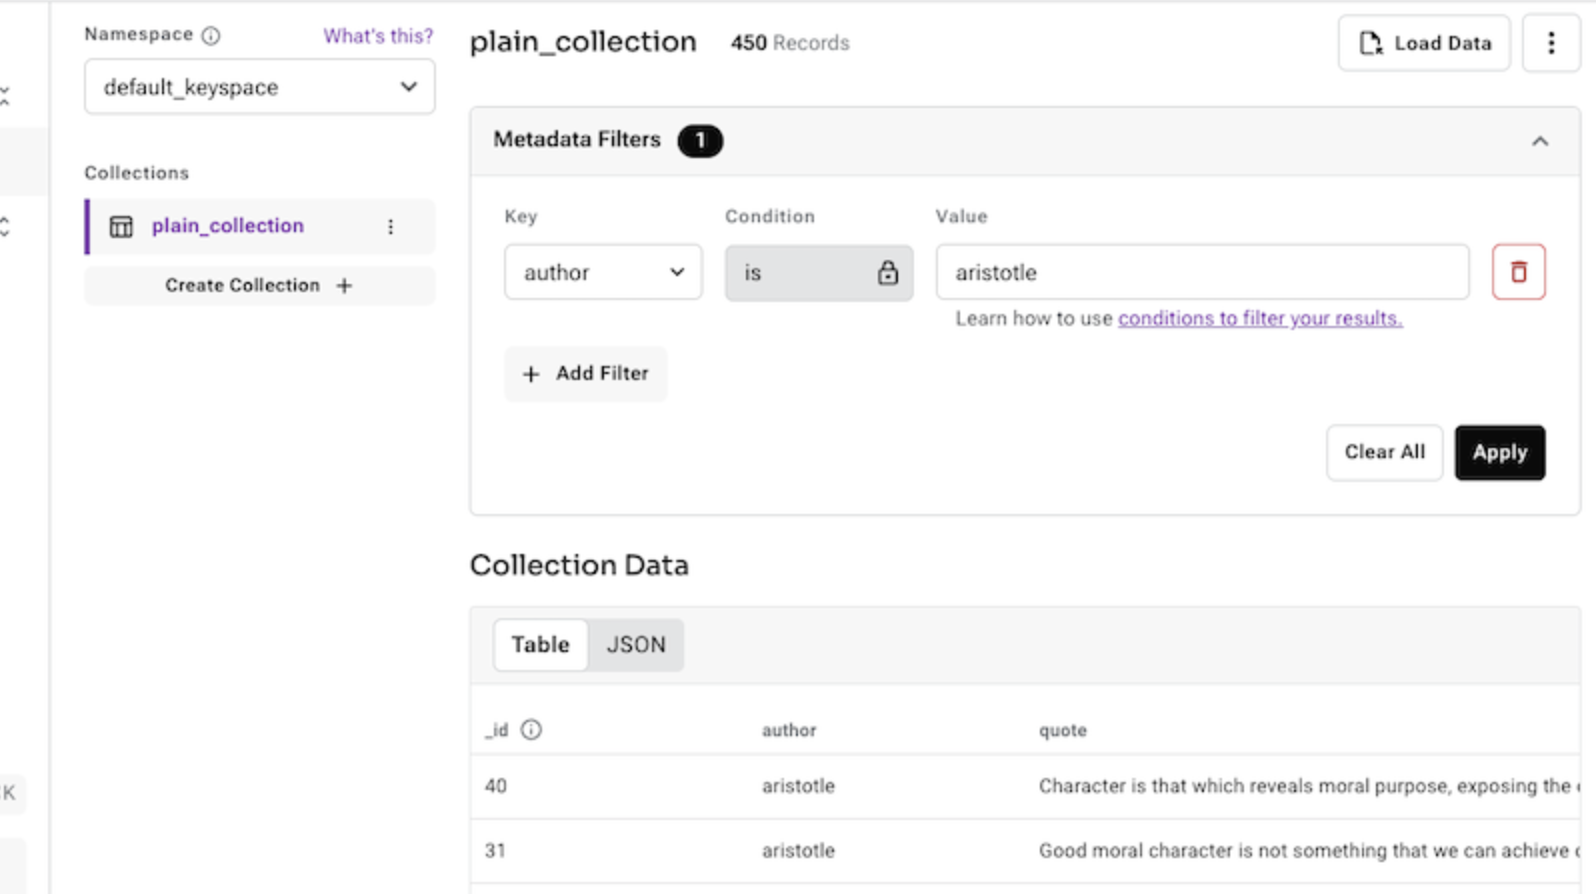

`✅ 2.1.f`: You can also list quotes here

In [14]:
doc_iterator = plain_collection.find({"author": "aristotle"})
for document in doc_iterator:
  print(document['quote'])

Character is that which reveals moral purpose, exposing the class of things a man chooses and avoids.
Good moral character is not something that we can achieve on our own. We need a culture that supports the conditions under which self-love and friendship flourish.
For what is the best choice for each individual is the highest it is possible for him to achieve.
At his best, man is the noblest of all animals; separated from law and justice he is the worst.
A friend is another I.
Consider pleasures as they depart, not as they come.
If you would understand anything, observe its beginning and its development
Democracy appears to be safer and less liable to revolution than oligarchy. For in oligarchies there is the double danger of the oligarchs falling out among themselves and also with the people; but in democracies there is only the danger of a quarrel with the oligarchs. No dissension worth mentioning arises among the people themselves. And we may further remark that a government which 

### 2.2 Indexing the Data with Glean

`✅ 2.2.a`: Get your GLEAN TOKEN

- [Authentication](https://developers.glean.com/docs/indexing_api/indexing_api_getting_started/#authentication)

In [15]:
# Customer and DataSource
os.environ["GLEAN_CUSTOMER"] = input("GLEAN_CUSTOMER = ")
os.environ["GLEAN_DATASOURCE_NAME"] = input("GLEAN_DATASOURCE_NAME = ")

# Glean API Information
# os.environ["GLEAN_API_USERNAME"] = input("GLEAN_API_USERNAME = ")
os.environ["GLEAN_API_TOKEN"] = getpass("GLEAN_API_TOKEN = ")
os.environ["GLEAN_API_ENDPOINT"] = "https://" + os.environ["GLEAN_CUSTOMER"] + "-be.glean.com/api/index/v1"
print("APP Setup, Endpoint is: " + os.environ["GLEAN_API_ENDPOINT"])

GLEAN_CUSTOMER = DataStax
GLEAN_DATASOURCE_NAME = astraDbCollectionDataSource
GLEAN_API_TOKEN = ··········
APP Setup, Endpoint is: https://DataStax-be.glean.com/api/index/v1


`✅ 2.2.b`: Install the indexing API python sdk locally

In [16]:
! pip install https://app.glean.com/meta/indexing_api_client.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.3/732.3 kB 61.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for glean-indexing-api-client: filename=glean_indexing_api_client-1.0.0-py3-none-any.whl size=485131 sha256=1be0968c30025bec013359320bc677b3ae51b15b4223cdeb145bf418ddf816ee
  Stored in directory: /tmp/pip-ephem-wheel-cache-u1195t3b/wheels/fa/81/45/5d838523ec3203fbfea653c9505faa3bc6091748849d1cd6e8
Successfully built glean-indexing-api-client


`✅ 2.2.c`: Set up the Glean API Client

In [18]:
import glean_indexing_api_client as indexing_api

# Initializing the glean configuration
configuration = indexing_api.Configuration(host=os.environ["GLEAN_API_ENDPOINT"], access_token=os.environ["GLEAN_API_TOKEN"])

# Initializing the glean client
api_client = indexing_api.ApiClient(configuration)

`✅ 2.2.d`: Testing Glean Credentials

In [25]:
import json
from  glean_indexing_api_client.api import datasources_api

# Listing datasource value
datasources_api = datasources_api.DatasourcesApi(api_client)
pretty_json = json.dumps(datasources_api.getdatasourceconfig_post_endpoint.params_map, indent=4)
print(pretty_json)

{
    "all": [
        "get_datasource_config_request",
        "async_req",
        "_host_index",
        "_preload_content",
        "_request_timeout",
        "_return_http_data_only",
        "_check_input_type",
        "_check_return_type",
        "_content_type",
        "_spec_property_naming",
        "_request_auths"
    ],
    "required": [
        "get_datasource_config_request"
    ],
    "nullable": [
        "_request_timeout"
    ],
    "enum": [],
    "validation": []
}


`✅ 2.2.e`: Setup a Datasource

> Glean Documentation:
> - [Setup a Datasource](https://developers.glean.com/docs/indexing_api/indexing_api_getting_started/#set-up-a-datasource)
> - [Add Datasource API Reference](https://developers.glean.com/indexing/tag/Datasources/paths/~1adddatasource/post/)

This operation can be done with the REST API or as a Custom Apps

In [26]:
import glean_indexing_api_client as indexing_api
from glean_indexing_api_client.api import datasources_api
from glean_indexing_api_client.model.custom_datasource_config import CustomDatasourceConfig
from glean_indexing_api_client.model.object_definition import ObjectDefinition

# config should be ok to get started.
datasource_config = CustomDatasourceConfig(
  name='astraDbCollectionDataSource',
  display_name='AstraDB Collection DataSource',
  datasource_category='PUBLISHED_CONTENT',
  url_regex='^https://68220f7b-72c2-4a99-a245-514cc67b9360-us-east-2.apps.astra.datastax.com',
  object_definitions=[
            ObjectDefinition(
                doc_category='PUBLISHED_CONTENT',
                name='AstraVectorEntry'
              )
          ],
  # Permissions will be specified by email addresses instead of a
  # datasource-specific ID.
  #is_user_referenced_by_email=True,
)

try:
  datasources_api.DatasourcesApi(api_client).adddatasource_post(datasource_config)
  #datasource_api.adddatasource_post(datasource_config)
  print('DataSource has been created !')
except indexing_api.ApiException as e:
  print('Exception when calling DatasourcesApi->adddatasource_post: %s\\n' % e)

DataSource has been created !


`✅ 2.2.f`: Describe the DataSource

In [27]:
from glean_indexing_api_client.model.get_datasource_config_request import GetDatasourceConfigRequest

getDataSourceConfigRequest = GetDatasourceConfigRequest(
    datasource='astraDbCollectionDataSource'
)

datasource_config = datasources_api.DatasourcesApi(api_client).getdatasourceconfig_post(getDataSourceConfigRequest);
#datasource_config = datasource_api.getdatasourceconfig_post(getDataSourceConfigRequest);
print(datasource_config)

{'connector_type': 'PUSH_API',
 'datasource_category': 'PUBLISHED_CONTENT',
 'display_name': 'AstraDB Collection DataSource',
 'is_entity_datasource': False,
 'is_test_datasource': False,
 'is_user_referenced_by_email': True,
 'name': 'CUSTOM_ASTRADBCOLLECTIONDATASOURCE',
 'object_definitions': [{'doc_category': 'PUBLISHED_CONTENT',
                         'name': 'AstraVectorEntry'}],
 'strip_fragment_in_canonical_url': True,
 'trust_url_regex_for_view_activity': True,
 'url_regex': '^https://68220f7b-72c2-4a99-a245-514cc67b9360-us-east-2.apps.astra.datastax.com'}


`✅ 2.2.g`: Index Collection in Glean

In [28]:
import glean_indexing_api_client as indexing_api
from glean_indexing_api_client.api import documents_api
from glean_indexing_api_client.model.index_document_request import IndexDocumentRequest
from glean_indexing_api_client.model.document_definition import DocumentDefinition
from glean_indexing_api_client.model.custom_property import CustomProperty
from glean_indexing_api_client.model.content_definition import ContentDefinition
from glean_indexing_api_client.model.user_reference_definition import (
    UserReferenceDefinition,
)
from glean_indexing_api_client.model.document_permissions_definition import (
    DocumentPermissionsDefinition,
)

def index_astra_document_into_glean(astraDocument):
    # Perform mapping here
    document_id = str(astraDocument['_id'])
    title = astraDocument['author'] + 'quote_' + str(astraDocument['_id'])
    body_text = astraDocument['quote']
    datasource_name = 'astraDbCollectionDataSource'

    # Ensure tags are split correctly
    tags = astraDocument['tags']

    # Create the request object
    request = IndexDocumentRequest(
        document=DocumentDefinition(
            datasource=datasource_name,
            #object_type="AstraVectorEntry",
            title=title,
            id=document_id,
            view_url="https://68220f7b-72c2-4a99-a245-514cc67b9360-us-east-2.apps.astra.datastax.com",
            body=ContentDefinition(mime_type="text/plain", text_content=body_text),
            permissions=DocumentPermissionsDefinition(
                allow_anonymous_access=True
            ),
        )
        #,
        #customProperties = [
        #  CustomProperty(**{'quote': astraDocument.get('quote')}),
        #  CustomProperty(**{'philosopher': astraDocument.get('philosopher')})]
    )
    documents_api_client = documents_api.DocumentsApi(api_client)
    try:
        api = documents_api_client.indexdocument_post(request)
    except indexing_api.ApiException as e:
        print(f"Exception when calling DocumentsApi->indexdocument_post: {e}\n")


## INDEXING

for doc in plain_collection.find():
  index_astra_document_into_glean(doc)